# Clustering participants based on their prosume aspects

In [1]:
%%capture

# Boilerplate required to import other notebooks
import ipynb.fs

# From the full "data_preparation" notebook import function(s)
from .full.data_preparation import *

In [2]:
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

## Defining the set of items which represent the prosume aspects of the survey

### In Spanish

In [4]:
def get_prosume_items_esp():
    # Creating lists that includes the items from the prosume construct

    all_prosume_items = ['Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]',
                         'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]',
                         'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]',
                         # 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [Otro]',
                         '¿Con qué frecuencia haces fotografías?',
                         # 'En caso afirmativo, ¿compartes habitualmente las imágenes que tomas?',
                         'Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)',
                         '¿Repites las imágenes hasta conseguir el resultado esperado?',
                         'En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?',
                         'Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?',
                         'Cuando compartes imágenes, ¿habitualmente las envías a otras personas?',
                         'Cuando compartes imágenes, ¿habitualmente las produces tú?',
                         'Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?',
                         'Si encuentras esta información visual sugerida, ¿cómo actúas?',
                         'Si tienes que crear una presentación de contenidos...',
                         'Si las buscas en Internet...',
                         # 'Si las generas tú...',
                         # 'Si las generas tú... [Otro]',
                         '¿Cuándo prosumes (produces y consumes) imágenes?',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]',
                         # 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [Otro]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]',
                         # 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [Otro]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]',
                         # '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [Otro]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]',
                         # '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [Otro]',
                         'Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?',
                         '¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?',
                         # '¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? [Otro]',
                         ]

    return all_prosume_items

### In English

In [5]:
def get_prosume_items_en():
    # Creating lists that includes the items from the prosume construct

    all_prosume_items = ['When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]',
                         'When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]',
                         'When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]',
                         # 'When you take a picture, what type of capture device do you use? (Multiple answer) [Other]',
                         'How often do you produce images?',
                         # 'If yes, do you usually share the images it produces?',
                         'When you produce images, how much time do you spend preparing it? (minutes)',
                         'Do you repeat the images until you get the expected result?',
                         'In your environment, do people who use technology create images and share them?',
                         'When you share images, do you usually receive them from other people?',
                         'When you share images, do you usually send them to other people?',
                         'When you submit an image, have you treated an image that you have previously received or that has been generated by you?',
                         'Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?',
                         'If you find that suggested information, what is your attitude?',
                         'If you have to create a content presentation...',
                         'If you look for images in the Internet...',
                         # 'If you generate your own images ...',
                         # 'If you generate your own images ... [Other]',
                         'When do you prosume (produce and consume) images?',
                         'If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]',
                         'If you produce images, what do you use for? [2. In order to better explain where I am]',
                         'If you produce images, what do you use for? [3. To express emotions]',
                         'If you produce images, what do you use for? [4. To save words]',
                         'If you produce images, what do you use for? [5. In order to share moments]',
                         # 'If you produce images, what do you use for? [Other]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]',
                         # 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [Other]',
                         'What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]',
                         'What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]',
                         'What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]',
                         'What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]',
                         # 'What images do you decide to share in social networks or other technological media? [Other]',
                         'With whom do you usually share images? [1. Friends]',
                         'With whom do you usually share images? [2. Family]',
                         'With whom do you usually share images? [3. Partners]',
                         'With whom do you usually share images? [4. With all my acquaintances]',
                         'With whom do you usually share images? [5. With nobody]',
                         # 'With whom do you usually share images? [Other]',
                         'When you produce images, do you think about the image you want to create before doing it?',
                         'How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?',
                         # 'How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means? [Other]',
                         ]

    return all_prosume_items

## Exploring possible clusters

These functions explore the main clusters available in a dataframe. Functions to manage the data (and column names) available in Spanish and English


Also, we include two examples to show how to use the functions

In [6]:
def test_find_clusters_prosume_en(dataframe):
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_en(clusters)
    clusters = drop_optional_columns_en(clusters)

    all_prosume_items = get_prosume_items_en()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')

    # Ploting our dendrogram.
    colors = ['g', 'b', 'r', 'p', 'y', 'b', 'w']
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sources')
    plt.ylabel('Distance')
    dendrogram(cluster_tree, leaf_rotation=80.,
               leaf_font_size=14.,  color_threshold=4.5)
    plt.show()

    fancy_dendrogram(
        cluster_tree,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=80.,
        leaf_font_size=14.,
        show_contracted=True,
        annotate_above=5,  # useful in small plots so annotations don't overlap
        color_threshold=4.5,
    )

    plt.show()

In [7]:
def test_find_clusters_prosume_esp(dataframe):
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_esp(clusters)
    clusters = drop_optional_columns_esp(clusters)

    all_prosume_items = get_prosume_items_esp()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')

    # Ploting our dendrogram.
    colors = ['g', 'b', 'r', 'p', 'y', 'b', 'w']
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sources')
    plt.ylabel('Distance')
    dendrogram(cluster_tree, leaf_rotation=80.,
               leaf_font_size=14.,  color_threshold=4.5)
    plt.show()

    fancy_dendrogram(
        cluster_tree,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=80.,
        leaf_font_size=14.,
        show_contracted=True,
        annotate_above=5,  # useful in small plots so annotations don't overlap
        color_threshold=4.5,
    )

    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  app.launch_new_instance()


,Age,Are you able to express verbally the emotions produced by an image you have seen?,"By reusing an image, can you redefine the message that the sender has thought about?",Classify your degree of vision,"Do you have access to devices (computer, mobile, tablet, etc.) connected to the Internet usually?","Do you have any visual deficiencies that affect the visual reception of shapes, colors, distances, etc.?",Do you know authors who work producing images?,Do you like to follow people you admire in social networks? Are you a fan or follower of any of them? Do you sometimes write comments in their publications?,Do you think that images produced by men are different from those made by women?,"Do you think that in the creation of images work more women, or men?",...,"When you receive/ consume images... (select the option / options with which you identify yourself) [1. I observe if they are beautiful, harmonic or not]",When you receive/ consume images... (select the option / options with which you identify yourself) [2. I wonder if they mean something to me],When you receive/ consume images... (select the option / options with which you identify yourself) [3. I observe the moment and context in which they appear],"When you share images on social networks, do the text companions follow the indications suggested by the applications (labeling, explanation of the image, inspiring text, etc.)?","When you take photos from any of the media at your fingertips, do the process facilitate the options offered by the applications (filter application, cuts, graphic editing, etc.)?","When you use social networks, do you consider that being accepted as a member of a group is more important than having autonomy and independence?",Which of the paired images do you find most attractive? 1/2 2/2.1,Which of the paired images do you find most attractive? 1/2 2/2.2,Which of the paired images do you find most attractive? 1/2 2/2.3,Which of the paired images do you find most attractive? 1/2 2/2.4
0,0.348981,-0.484991,-0.322794,-1.218193,0.542426,-0.430664,-0.640255,0.324719,1.412832,0.363058,...,0.751868,0.899423,-1.066063,-1.860199,-0.143225,-1.295600,-1.085807,0.781885,0.714033,1.066063
1,2.356095,-0.484991,-0.322794,-1.218193,0.542426,-0.430664,-0.640255,-1.591123,-0.707798,0.363058,...,-1.330020,0.899423,-1.066063,0.027066,-0.143225,-0.417751,0.920974,0.781885,0.714033,1.066063
2,-0.373580,-0.484991,-0.322794,-0.035466,0.542426,-0.430664,1.561878,0.324719,1.412832,-0.764332,...,0.751868,0.899423,0.938031,0.027066,1.687670,-0.417751,-1.085807,-1.278960,0.714033,1.066063
3,-0.132726,-0.484991,-0.322794,-0.035466,0.542426,-0.430664,1.561878,0.324719,1.412832,1.490448,...,0.751868,-1.111824,0.938031,1.914332,1.687670,-0.417751,-1.085807,0.781885,0.714033,-0.938031
4,-0.694718,-1.535804,1.581690,-0.035466,0.542426,-0.430664,-0.640255,-0.633202,-0.707798,1.490448,...,-1.330020,-1.111824,0.938031,0.970699,-0.143225,-0.417751,-1.085807,0.781885,0.714033,1.066063


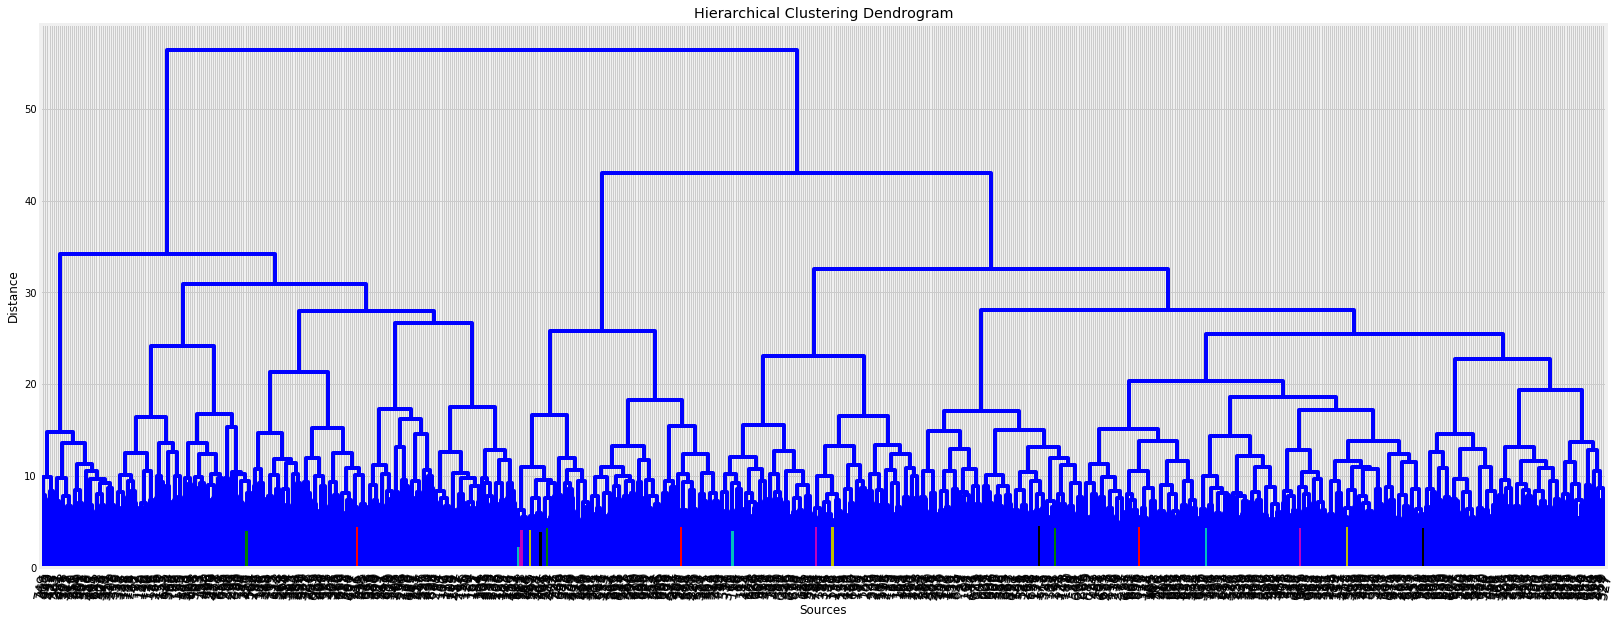

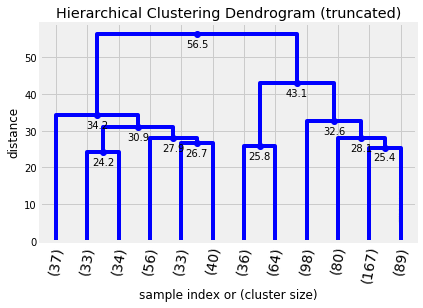

In [8]:
test_find_clusters_prosume_en(get_dataframe_analysis_en(True))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  app.launch_new_instance()


,"Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?",Clasifica tu grado de visión,"Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?","Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)?","Cuando observas estas imágenes, ¿entiendes lo que pasa, aunque los sujetos/objetos no se muestren de forma completa? 1 2 3 4","Cuando observas una imagen, ¿te preguntas cosas acerca de los personajes/objetos que aparecen en la misma?","Cuando recibes o consumes una imagen, ¿la comparas con tu propia realidad? ¿Intentas encontrar en tu entorno cierto parecido?","Cuando recibes o consumes una imagen, ¿piensas en el modo en que fue obtenida (técnicamente)?","Cuando recibes/consumes imágenes... (Respuesta múltiple) [1. Observo si son bellas, armónicas o no]",Cuando recibes/consumes imágenes... (Respuesta múltiple) [2. Me planteo si significan algo para mí],...,¿Has reconocido la/las formas rápidamente?,"¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [1. Apps de contenidos audiovisuales (Netflix, HBO, etc.)]","¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [2. Aplicaciones de mensajería (Whatsapp, Facebook Messenger, etc.)]","¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [3. Bibliotecas de fotos online (Google Photos, iPhoto, etc.)]","¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [4. Redes sociales (Facebook, Instagram, Twitter, etc.).]","¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [5. Aplicaciones de vídeo (Youtube, Vimeo, etc.).]",¿Te gusta seguir a personas que admiras en redes sociales? ¿Eres fan o follower de alguna? ¿En ocasiones escribes comentarios en sus publicaciones?,"¿Tienes acceso a dispositivos (ordenador, móvil, tablet, etc.) conectados a Internet habitualmente?","¿Tienes alguna carencia visual que afecte a la recepción de formas, colores, distancias, etc.?",¿Utilizas gafas o lentes de contacto?
0,-0.322794,-1.218193,-1.860199,-0.143225,-0.180359,0.506719,-1.353917,0.858744,0.751868,0.899423,...,-0.013042,0.892330,0.515438,1.006540,0.484876,0.620062,0.324719,0.542426,-0.430664,0.965396
1,-0.322794,-1.218193,0.027066,-0.143225,-0.180359,0.506719,-0.314423,-0.098606,-1.330020,0.899423,...,-0.013042,0.892330,0.515438,-0.993502,-2.062383,0.620062,-1.591123,0.542426,-0.430664,0.965396
2,-0.322794,-0.035466,0.027066,1.687670,-0.180359,-0.524192,-0.314423,-1.055955,0.751868,0.899423,...,-0.013042,0.892330,0.515438,1.006540,0.484876,0.620062,0.324719,0.542426,-0.430664,0.965396
3,-0.322794,-0.035466,1.914332,1.687670,-0.180359,0.506719,0.725071,-0.098606,0.751868,-1.111824,...,-0.013042,-1.120662,0.515438,1.006540,0.484876,0.620062,0.324719,0.542426,-0.430664,0.965396
4,1.581690,-0.035466,0.970699,-0.143225,-0.180359,-0.524192,-1.353917,-0.098606,-1.330020,-1.111824,...,-0.013042,-1.120662,0.515438,-0.993502,0.484876,0.620062,-0.633202,0.542426,-0.430664,0.965396


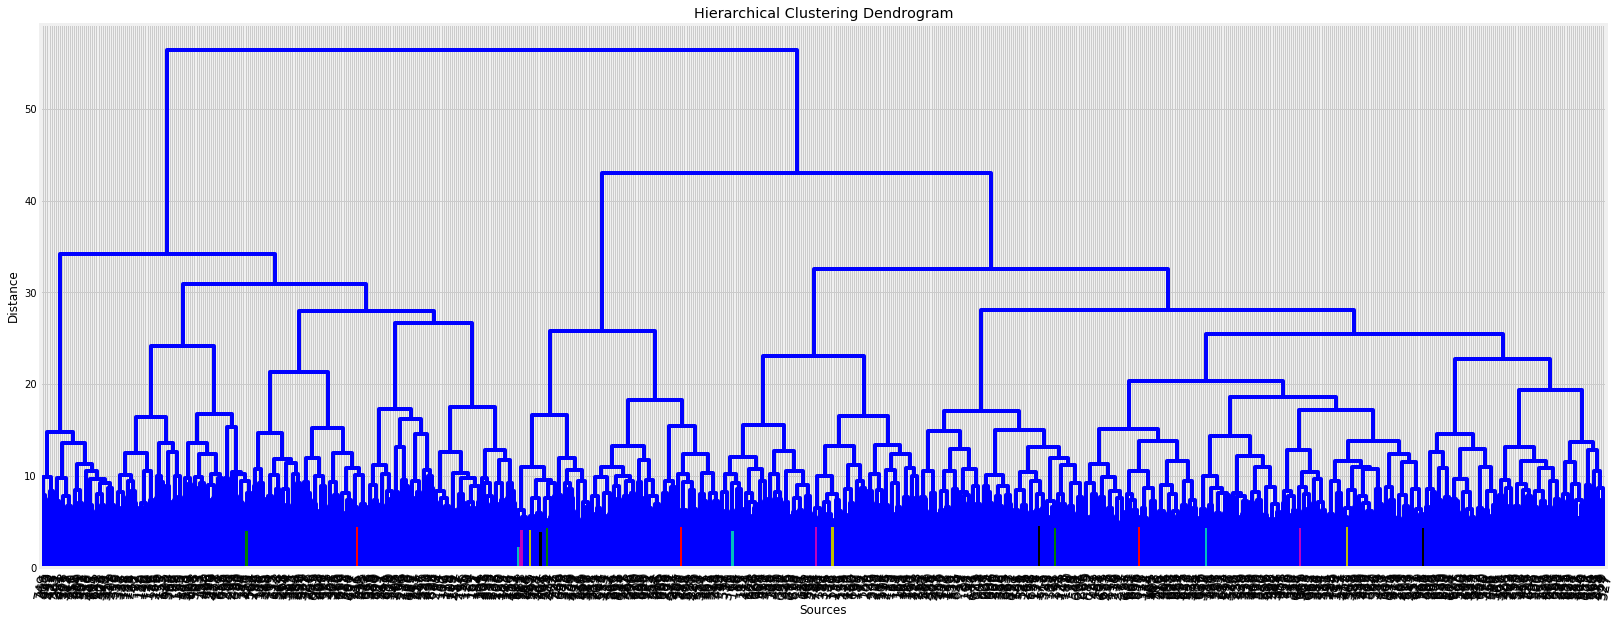

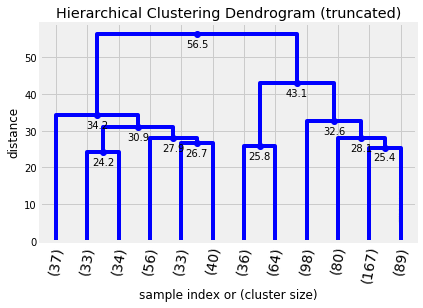

In [9]:
test_find_clusters_prosume_esp(get_dataframe_analysis_esp(True))

## Obtaining clusters from data

These functions obtain the clusters from a dataframe and return another dataframe with a new column called 'prosume_cluster' which represents the cluster related to prosume aspects assigned to each participant 

Also, we include two examples to show how to use the functions. The Euclidean distance used as a cutoff point to get the clusters in the examples is '28' as shown in the graphs displayed in the test functions `test_find_clusters_en()` and `test_find_clusters_esp()`

In [10]:
def get_dataframe_with_clusters_en(dataframe, max_euc_distance):
    
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_en(clusters)
    clusters = drop_optional_columns_en(clusters)

    all_prosume_items = get_prosume_items_en()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    # display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')
    
    dataframe_with_clusters = clusters
    clusters_got = fcluster(cluster_tree, max_euc_distance, criterion='distance')
    dataframe_with_clusters['prosume_cluster'] = clusters_got
    
    return dataframe_with_clusters

In [11]:
def get_dataframe_with_clusters_esp(dataframe, max_euc_distance):
    
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_esp(clusters)
    clusters = drop_optional_columns_esp(clusters)

    all_prosume_items = get_prosume_items_esp()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    # display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')
    
    dataframe_with_clusters = clusters
    clusters_got = fcluster(cluster_tree, max_euc_distance, criterion='distance')
    dataframe_with_clusters['prosume_cluster'] = clusters_got
    
    return dataframe_with_clusters

In [12]:
dataframe_with_clusters_en = get_dataframe_with_clusters_en(get_dataframe_analysis_en(True), 24)

print("Number of clusters: "+ str(len(dataframe_with_clusters_en['prosume_cluster'].unique())))
dataframe_with_clusters_en['prosume_cluster'].value_counts()

Number of clusters: 12


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


11    167
9      98
12     89
10     80
8      64
4      56
6      40
1      37
7      36
3      34
5      33
2      33
Name: prosume_cluster, dtype: int64

In [13]:
dataframe_with_clusters_esp = get_dataframe_with_clusters_esp(get_dataframe_analysis_esp(True), 24)

print("Número de clusters: "+ str(len(dataframe_with_clusters_esp['prosume_cluster'].unique())))
dataframe_with_clusters_esp['prosume_cluster'].value_counts()

Número de clusters: 12


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


11    167
9      98
12     89
10     80
8      64
4      56
6      40
1      37
7      36
3      34
5      33
2      33
Name: prosume_cluster, dtype: int64